# The Spark Foundation: Data Science and Business Analytics Internship

## Task3- Exploratory Data Analysis - Retail
Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 
 
As a business manager, try to find out the weak areas where you can work to make more profit

## Author: Soni Mrunaliben

In [1]:
# Importing neccessary Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

# To ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the dataset

df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head() # It give us the first 5 observation

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Preprocessing

In [4]:
# To know the dimension of the datset

df.shape

(9994, 13)

In [5]:
# To check the information of the dataset using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


From this info() I can also say that their no null values are present in the dataset

In [6]:
# Describing the datset
# By default it only takes the numerical variable

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# Checking the dulicate observations in a dataset
df.duplicated().sum()

17

In [8]:
# Dropping that duplicate obseravation from the data set

df.drop_duplicates()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [9]:
df.shape # Dimension of the datset

(9994, 13)

In [10]:
# Removing the unnecessary columns like postal code from the data set
df = df.drop(['Postal Code'],axis=1)

In [11]:
df.shape

(9994, 12)

## Exploratory Data Analytics

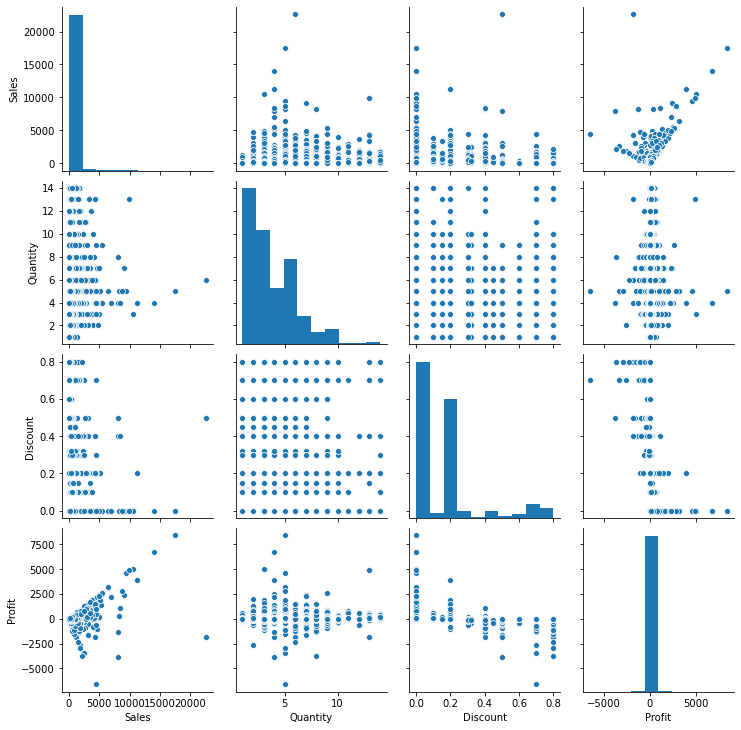

In [12]:
#First visualizing the whole dataset using pair plot
sns.pairplot(df)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


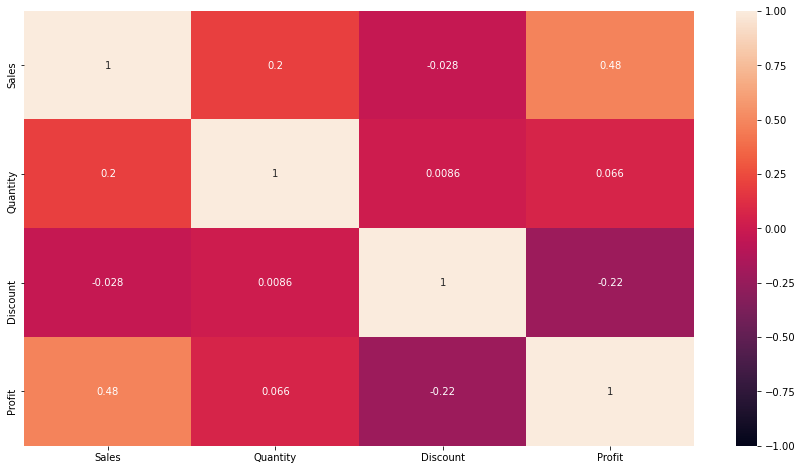

In [13]:
#Heatmaps are useful to visualize the magnitude of relationship between multiple  variables usig the coreelation matrix.
#Pairs which show high correlation, <-0.75 or >0.75, should be considered and we can eliminate one variable out of the pair leading to fetaure selection.
#value close to 1-->high positive correlation
#value close to -1-->high negative correlation
#value close to 0-->no correlation

# finding the correlations between the columns and visualising it using heatmaps
plt.figure(figsize=(15,8))
corr_df = df.corr(method = 'pearson')
print(corr_df)

sns.heatmap(corr_df, vmax = 1, vmin= -1,annot = True) # To display the value on heatmap annot= true

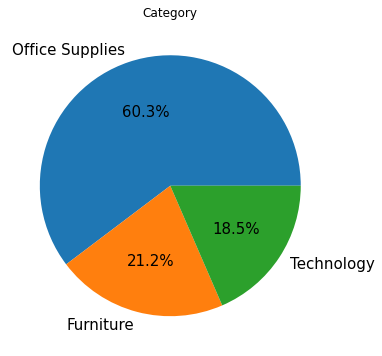

In [14]:

plt.figure(figsize = (10,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index,autopct='%1.1f%%',
        textprops = textprops)
plt.show()

<Figure size 1440x720 with 0 Axes>

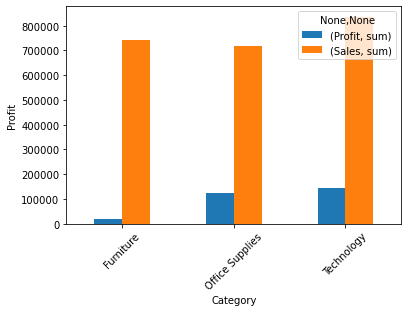

In [15]:

plt.figure(figsize= (20,10))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.xticks(rotation = 45)
plt.show()

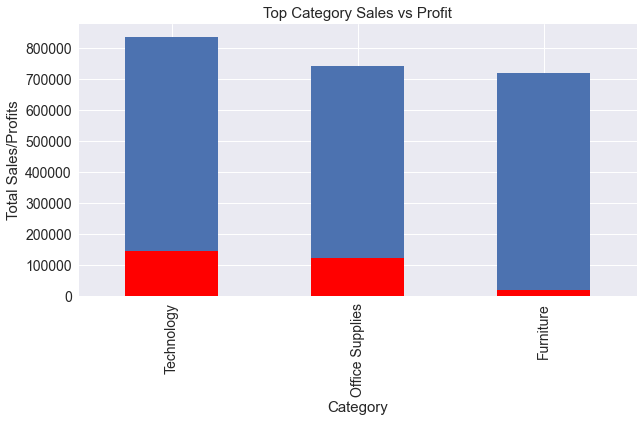

In [16]:
# computing top categories in terms of sales from first 100 observations
top_category_s = df.groupby("Category").Sales.sum().nlargest(n=100)

# computing top categories in terms of profit from first 100 observations
top_category_p = df.groupby("Category").Profit.sum().nlargest(n=100)

# plotting to see it visually
top_category_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_category_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='red')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Category Sales vs Profit",fontsize = 15)
plt.show()

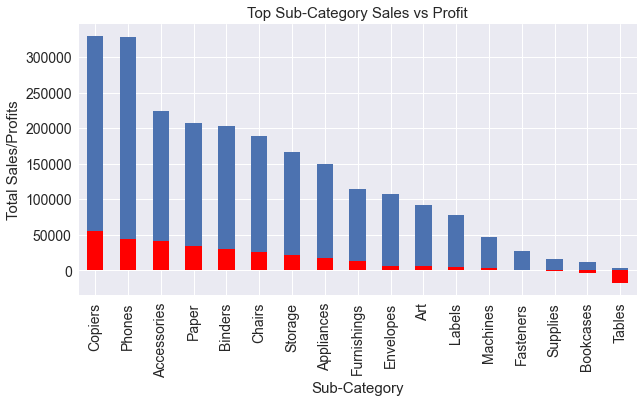

In [17]:
# Visualizing it for sub-category

# computing top sub-categories in terms of sales from first 100 observations
top_subcategory_s = df.groupby("Sub-Category").Sales.sum().nlargest(n = 100)
# computing top sub-categories in terms of profit from first 100 observations
top_subcategory_p = df.groupby("Sub-Category").Profit.sum().nlargest(n = 100)

# plotting to see it visually
plt.style.use('seaborn')
top_subcategory_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_subcategory_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 15)
plt.show()

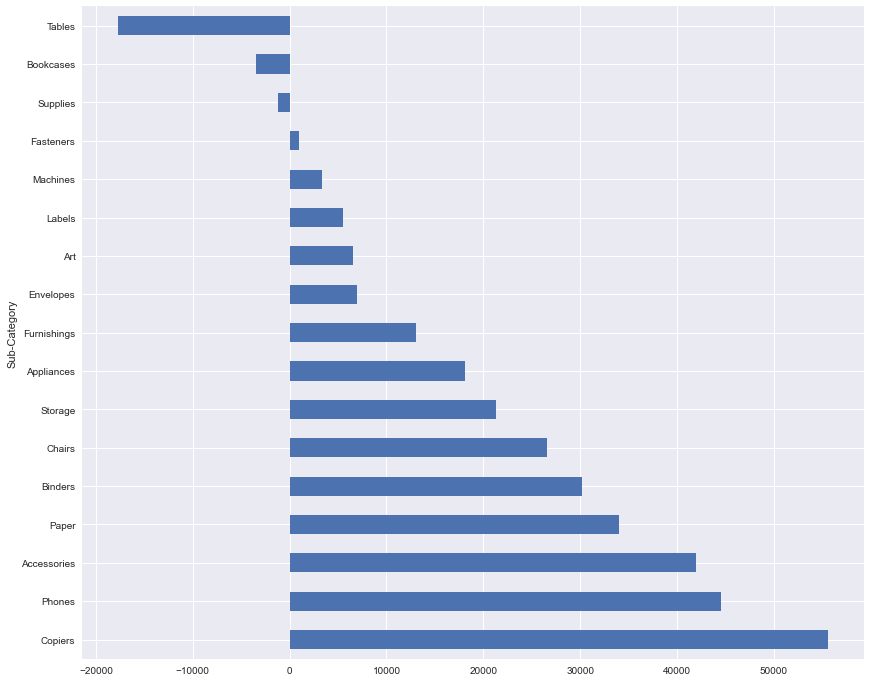

In [18]:
# A more detailed view
plt.figure(figsize=(14,12))
statewise = df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh() # h for horizontal

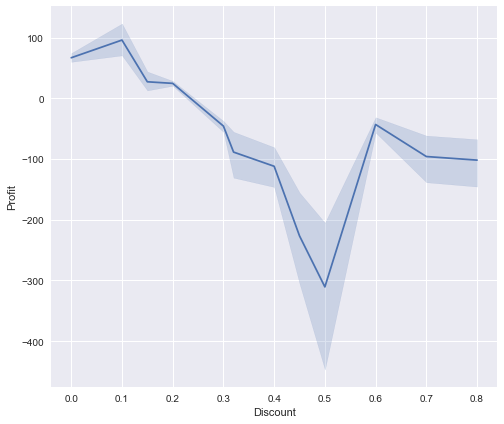

In [19]:
plt.figure(figsize=(8,7))
sns.lineplot(df['Discount'], df['Profit'], data=df)

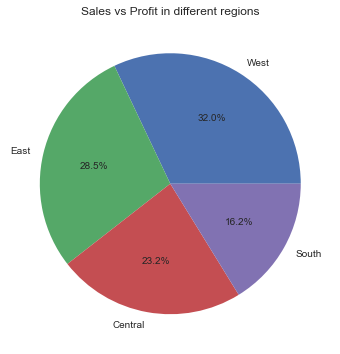

In [20]:

plt.figure(figsize = (10,6))
plt.title('Sales vs Profit in different regions')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

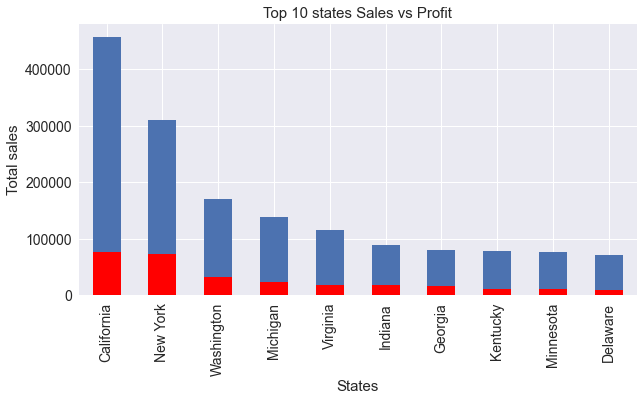

In [21]:
# computing top states in terms of sales from first 10 observations
top_states_s = df.groupby("State").Sales.sum().nlargest(n=10)

# computing top states in terms of profit from first 10 observations
top_states_p = df.groupby("State").Profit.sum().nlargest(n = 10)

plt.style.use('seaborn')
top_states_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_states_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('States',fontsize = 15)
plt.ylabel('Total sales',fontsize = 15)
plt.title("Top 10 states Sales vs Profit",fontsize = 15)
plt.show()

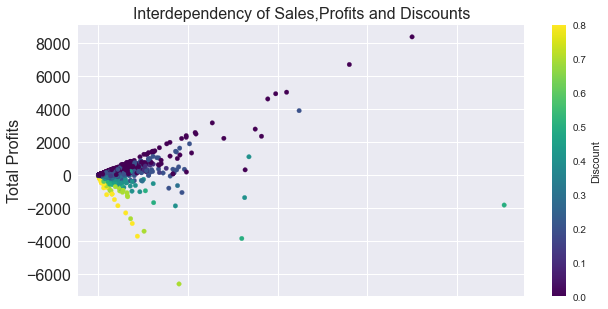

In [23]:
df.plot(kind = "scatter",figsize = (10,5), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.xlabel('sales', fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()